# 1. Importing Libraries

In [17]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn as kl

import matplotlib.pyplot as plt

# 2. Loading Dataset

In [19]:
df = pd.read_csv('sleep.csv')

In [20]:
df.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                     't':'body temperature', 'lm':'limb movement', 
                     'bo':'blood oxygen', 'rem':'eye movement', 
                     'sr.1':'sleeping hours','hr':'heart rate', 
                     'sl':'stress level'}, inplace = True)

In [21]:
df

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


# 3. Data Cleaning

### Task 1. Missing Values

In [24]:
df.isna().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

There are no missing values in the dataset.

### Task 2. Duplicates

In [27]:
df.duplicated().any()

False

Luckily there are no duplicates as well.

### Task 3. Checking for any incosistencies in the data

In [30]:
df.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


### Task 4. Checking for imbalance in target column

In [33]:
!pip install yellowbrick


In [34]:
# we will use the ClassBalance function, which makes it easier to see if the target column is balanced or not.
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

In [35]:
lab = np.unique(df['stress level'].values)
lab

array([0, 1, 2, 3, 4])

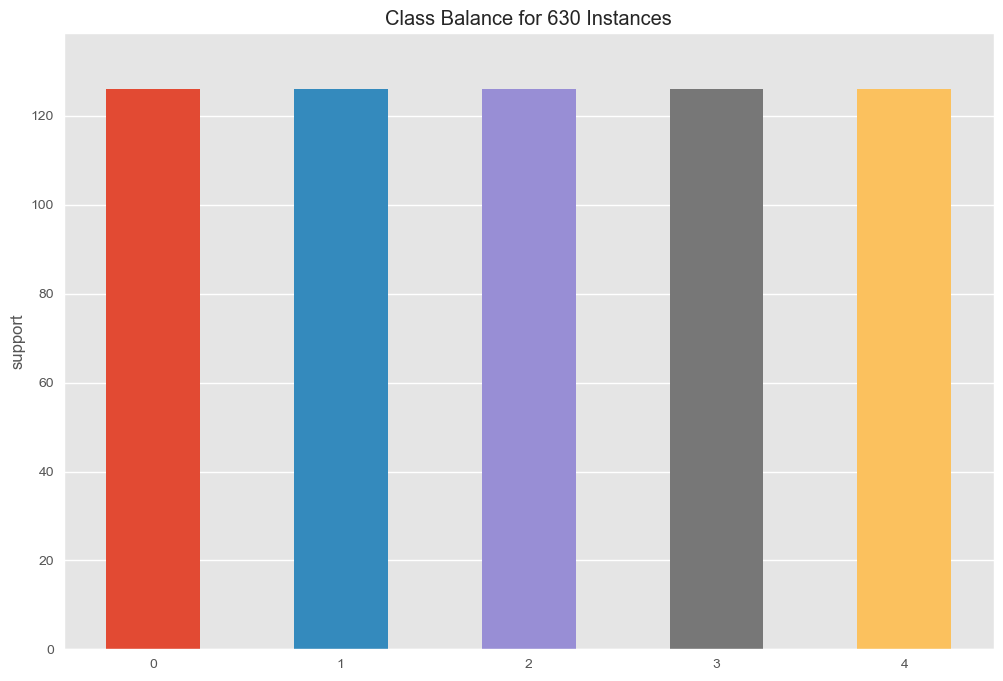

<Axes: title={'center': 'Class Balance for 630 Instances'}, ylabel='support'>

In [36]:
# we want to see if the values are balanced, so we took all unique values from `stress level` column.
viz = ClassBalance(labels=lab).fit(df['stress level'])
viz.show()

Looks like our target column is balanced.

# 4. Exploratory Data Analysis

In [39]:
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


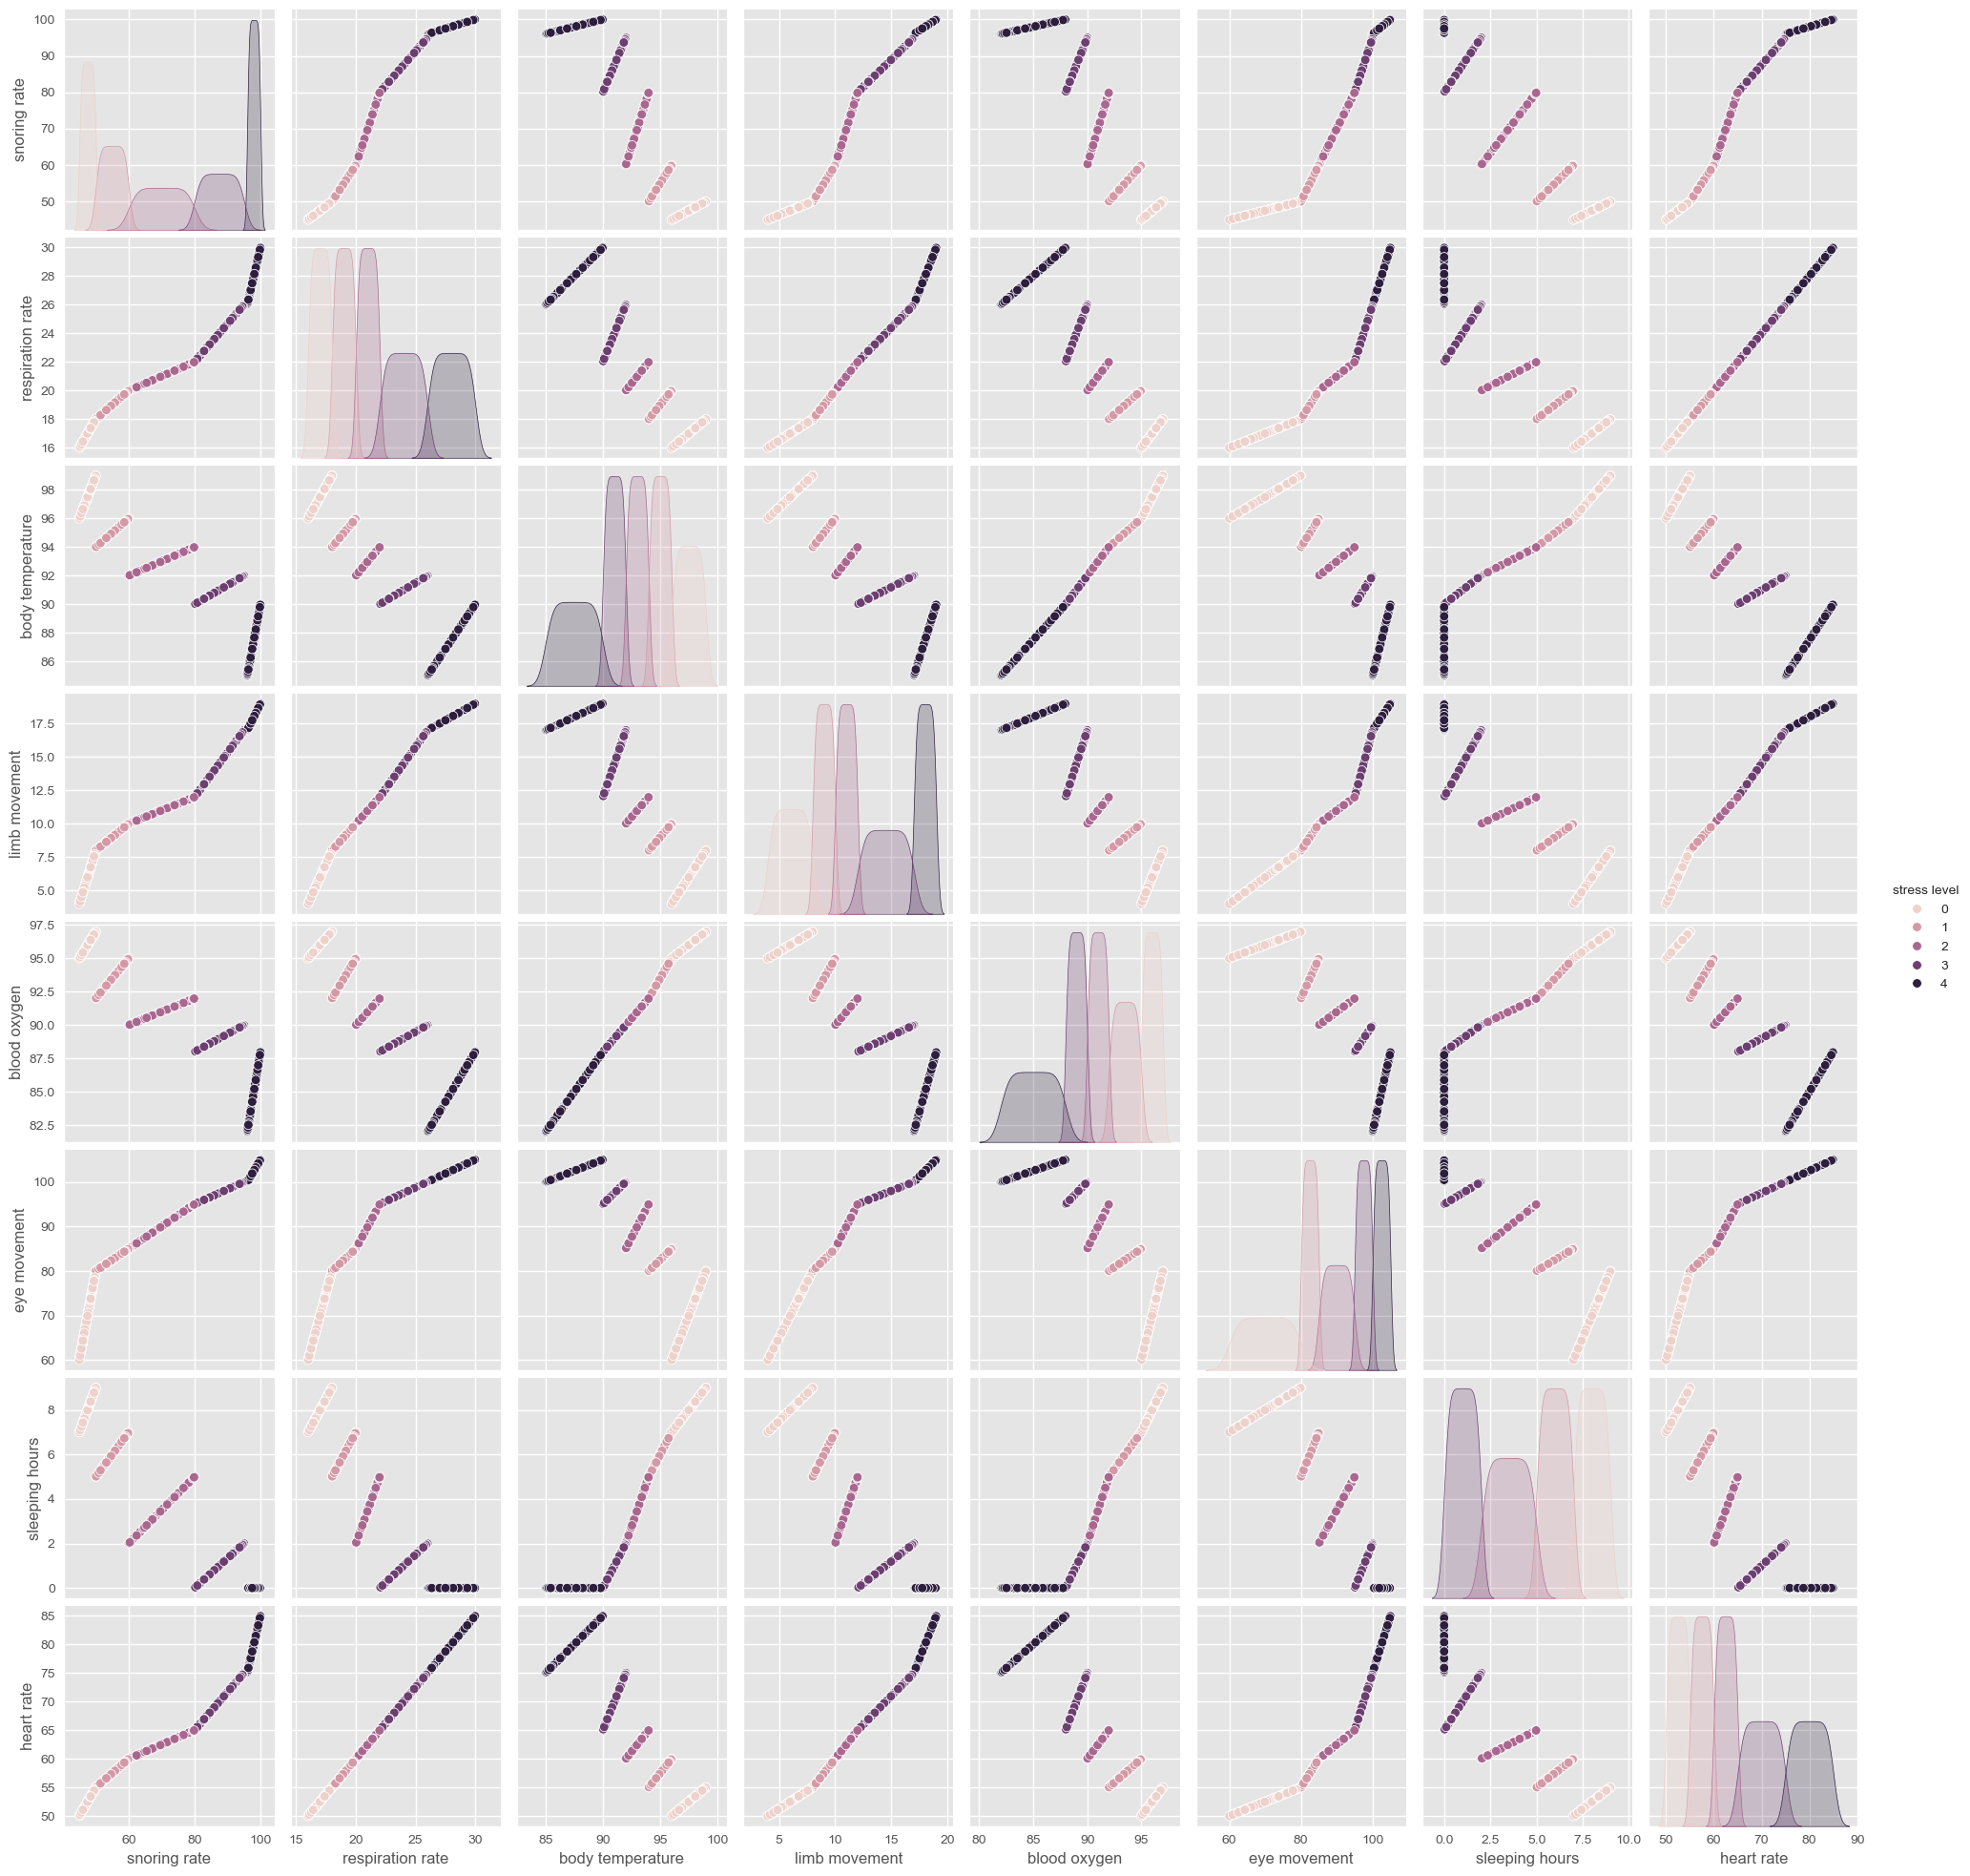

In [40]:
sns.pairplot(df, hue='stress level')

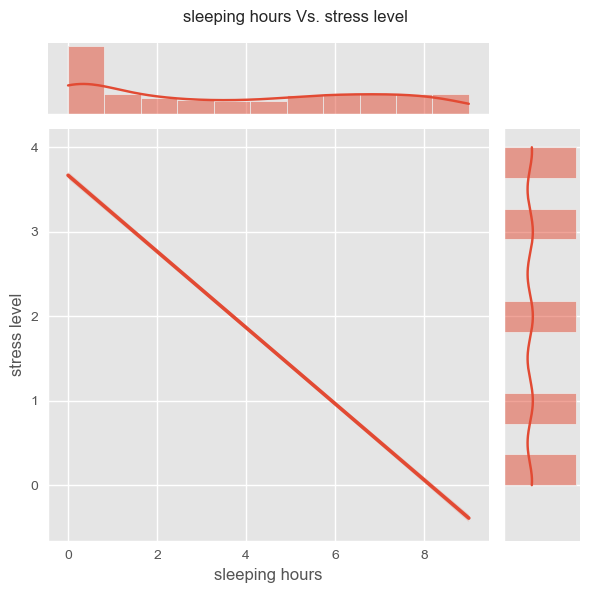

In [41]:
fig = sns.jointplot(x='sleeping hours', y='stress level',kind='reg', data=df)
plt.suptitle('sleeping hours Vs. stress level')
fig.fig.tight_layout()
fig.ax_joint.collections[0].set_alpha(0)

**As sleeping hours increases, stress level decreases.**

# 5. Feature Engineering

### Task 1. Defining Prediction and Target columns

In [45]:
X = df[df.columns[:-1]] # prediction
y = df[df.columns[-1]].values #target 

In [46]:
y

array([3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 0, 4, 3, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 1, 3, 2, 0, 4, 0, 4, 2, 3, 0, 4, 0, 4, 2, 2, 2, 0,
       2, 4, 2, 4, 1, 4, 0, 1, 3, 0, 1, 2, 4, 3, 3, 1, 4, 3, 0, 2, 4, 1,
       0, 2, 4, 0, 1, 4, 1, 0, 0, 4, 4, 1, 3, 4, 1, 1, 1, 4, 2, 1, 1, 1,
       3, 4, 2, 3, 2, 4, 0, 2, 4, 2, 2, 3, 4, 4, 0, 4, 1, 2, 2, 2, 4, 1,
       2, 4, 0, 3, 2, 4, 2, 2, 0, 1, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 0,
       4, 3, 1, 0, 0, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 4, 4,
       0, 2, 3, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 0, 4, 4, 1, 2, 2, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 4, 0, 0, 0,
       2, 3, 0, 0, 0, 2, 4, 0, 2, 4, 1, 1, 1, 3, 0, 0, 3, 3, 0, 2, 2, 2,
       1, 4, 0, 1, 3, 4, 2, 1, 4, 0, 3, 4, 1, 3, 0, 0, 3, 4, 3, 1, 4, 3,
       3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 0,
       0, 1, 2, 3, 2, 2, 4, 4, 1, 0, 4, 1, 2, 3, 4, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 3, 2, 4, 0, 4, 0, 4, 0, 2, 1, 2, 1, 3,

In [47]:
X

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


### Task 2.  Standardizing Data using MinMaxScaler

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X.values)

In [50]:
X

array([[0.88727273, 0.69142857, 0.48857143, ..., 0.88      , 0.20444444,
        0.69142857],
       [0.848     , 0.65028571, 0.468     , ..., 0.864     , 0.17244444,
        0.65028571],
       [0.27272727, 0.28571429, 0.78571429, ..., 0.55555556, 0.77777778,
        0.28571429],
       ...,
       [0.95461818, 0.82171429, 0.13428571, ..., 0.93066667, 0.        ,
        0.82171429],
       [0.248     , 0.26628571, 0.76628571, ..., 0.54044444, 0.74755556,
        0.26628571],
       [0.52581818, 0.38514286, 0.59942857, ..., 0.71022222, 0.45422222,
        0.38514286]])

### Task 3. Splitting Data into Training and Testing set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Model Evaluation

### Creating a Dataframe to store feature values of different columns for different models

In [55]:
# name of columns
feature_list = df.columns[:-1].values
feature_list

array(['snoring rate', 'respiration rate', 'body temperature',
       'limb movement', 'blood oxygen', 'eye movement', 'sleeping hours',
       'heart rate'], dtype=object)

In [56]:
lst = ['Logistic Reggression', 'Descion Tree', 'Random Forest', 'Adaboost']
df_importance = pd.DataFrame(index=feature_list, columns=lst)

In [57]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,NaN,NaN,NaN,NaN
respiration rate,NaN,NaN,NaN,NaN
body temperature,NaN,NaN,NaN,NaN
limb movement,NaN,NaN,NaN,NaN
blood oxygen,NaN,NaN,NaN,NaN
eye movement,NaN,NaN,NaN,NaN
sleeping hours,NaN,NaN,NaN,NaN
heart rate,NaN,NaN,NaN,NaN


## 1. Logistic Regression

### On all features

In [60]:
# Train Test spilt
X_train_log, X_test_log, y_train_log, y_test_log = X_train, X_test, y_train, y_test

In [61]:
model_log = LogisticRegression(solver='newton-cg')
model_log.fit(X_train_log, y_train_log)
pred_log = model_log.predict(X_test_log)

In [62]:
print(" Classifier report: \n\n", classification_report(y_test_log, pred_log))

 Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



<Axes: >

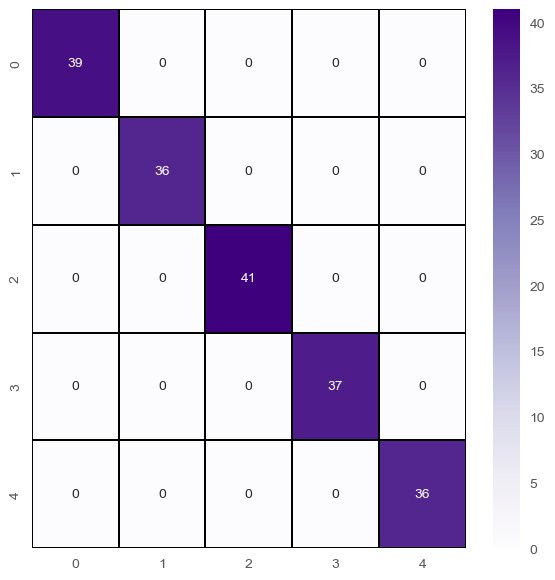

In [63]:
cm = confusion_matrix(y_test_log, pred_log)
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")

In [64]:
#storing all model's accuracy
all_accuracy = []
all_accuracy.append(accuracy_score(y_test, pred_log, normalize=True, sample_weight=None))

In [65]:
all_accuracy

[1.0]

In [66]:
model_log.coef_

array([[-2.18891823, -2.12775829,  3.05632748, -2.81313   ,  2.74096436,
        -3.75015242,  3.7688565 , -2.12775829],
       [-3.30327816, -0.85882935,  0.15327116, -0.04887467,  0.9145374 ,
         0.24606109,  2.34287631, -0.85882935],
       [ 0.32059337, -0.52855688, -0.11300012, -0.89066796, -0.71056117,
         0.76349786, -0.40634984, -0.52855688],
       [ 3.07676687,  0.09907898,  0.09631109,  1.2105614 ,  0.40009587,
         1.38291955, -3.7495876 ,  0.09907898],
       [ 2.09483615,  3.41606555, -3.19290961,  2.54211122, -3.34503646,
         1.35767392, -1.95579538,  3.41606555]])

In [67]:
# mapping target column to coefficient obtained from the model as features
#parameters=dict(zip(df.columns[:-1].values,model_log.coef_[0]))
model_log.coef_[0]

array([-2.18891823, -2.12775829,  3.05632748, -2.81313   ,  2.74096436,
       -3.75015242,  3.7688565 , -2.12775829])

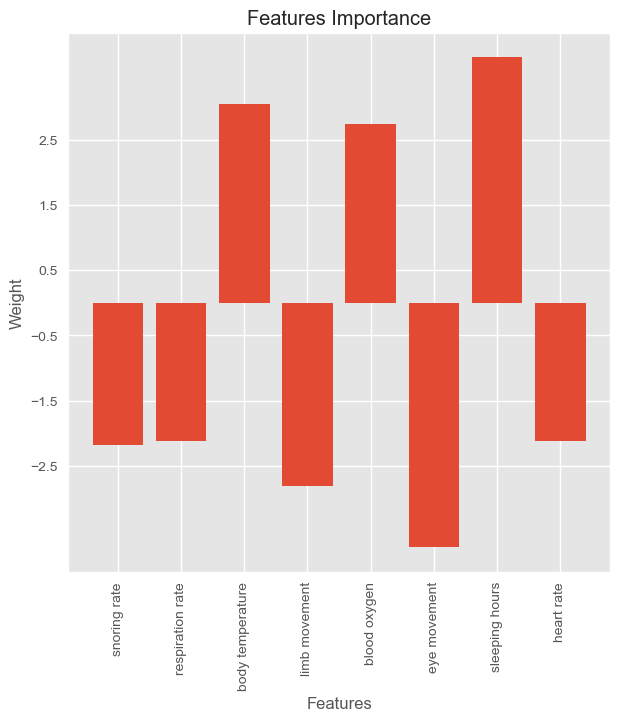

In [68]:
p_lr = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(-2.5, 3.5, 1)) #range for y axis

# create a placeholders with x_values then draw bar with weight_lr
x_values = list(range(len(feature_list))) # feature_list is name of columns
weigth_lr = model_log.coef_[0] #bar height is the feature/coefficient value

# create a placeholders with x_values then draw bar with weight_lr
plt.bar(x_values, weigth_lr, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Weight'); plt.xlabel('Features'); plt.title('Features Importance');

# adding feature/coefficient value from the model to our df_importance table
df_importance['Logistic Reggression'] = weigth_lr

### Logistic Regression model on 4 significant features

In [70]:
df_log1 = df[['sleeping hours', 'eye movement','body temperature','limb movement', 'stress level']]
df_log1

,sleeping hours,eye movement,body temperature,limb movement,stress level
0,1.840,99.60,91.840,16.600,3
1,1.552,98.88,91.552,15.880,3
2,7.000,85.00,96.000,10.000,1
3,0.768,96.92,90.768,13.920,3
4,8.248,72.48,97.872,6.496,0
...,...,...,...,...,...
625,3.440,89.80,92.960,10.960,2
626,8.376,73.76,98.064,6.752,0
627,0.000,101.88,86.880,17.752,4
628,6.728,84.32,95.728,9.728,1


In [71]:
# split the dataset into X and y
X_log1 = df_log1[df_log1.columns[:-1]]
y_log1 = df_log1[df_log1.columns[-1]].values

# train test split
X_train_log1, X_test_log1, y_train_log1, y_test_log1 = train_test_split(X_log1, y_log1, test_size=0.3, random_state=42)
# print(f'{X_train_log1.shape} {y_train_log1.shape} {X_test_log1.shape} {y_test_log1.shape}')

# train logistic regression model
model_log1 = LogisticRegression(solver='newton-cg')
model_log1.fit(X_train_log1, y_train_log1)

# predict on test set
y_pred_log1 = model_log1.predict(X_test_log1)

print('confusion matrix:')
print(confusion_matrix(y_test_log1, y_pred_log1), "\n")
accuracy = accuracy_score(y_test_log1, y_pred_log1, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log1,y_pred_log1))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 1.0


### Logistic Regression model on 3 significant features

In [73]:
df_log2 = df[['sleeping hours', 'eye movement','body temperature','stress level']]
df_log2

,sleeping hours,eye movement,body temperature,stress level
0,1.840,99.60,91.840,3
1,1.552,98.88,91.552,3
2,7.000,85.00,96.000,1
3,0.768,96.92,90.768,3
4,8.248,72.48,97.872,0
...,...,...,...,...
625,3.440,89.80,92.960,2
626,8.376,73.76,98.064,0
627,0.000,101.88,86.880,4
628,6.728,84.32,95.728,1


In [74]:
# split the dataset into X and y
X_log2 = df_log2[df_log2.columns[:-1]]
y_log2 = df_log2[df_log2.columns[-1]].values

# train test split
X_train_log2, X_test_log2, y_train_log2, y_test_log2 = train_test_split(X_log2, y_log2, test_size=0.3, random_state=42)

# train logistic regression model
model_log2 = LogisticRegression(solver='newton-cg')
model_log2.fit(X_train_log2, y_train_log2)

# predict on test set
y_pred_log2 = model_log2.predict(X_test_log2)

print('confusion matrix:')
print(confusion_matrix(y_test_log2, y_pred_log2), "\n")
accuracy = accuracy_score(y_test_log2, y_pred_log2, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log2,y_pred_log2))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 1.0


### Logistic Regression model on 2 significant features

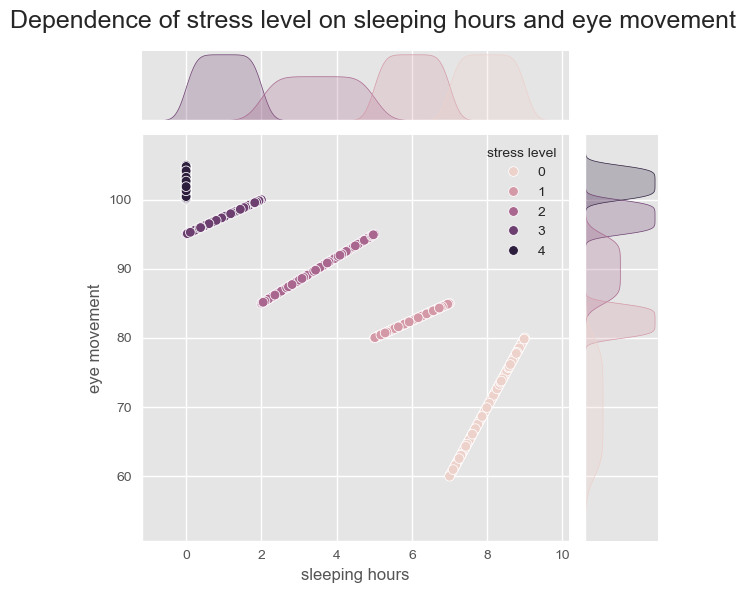

In [76]:
p = sns.jointplot(x='sleeping hours', y='eye movement', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and eye movement", fontsize=18)
p.fig.tight_layout()

We can see that high 'eye movement' use to have high stress level, and long sleeping use to have low stress level. In addition, the more you sleep, the less you have eye movement (on the contrary).

In [78]:
df_log3 = df[['sleeping hours', 'eye movement','stress level']]
df_log3

,sleeping hours,eye movement,stress level
0,1.840,99.60,3
1,1.552,98.88,3
2,7.000,85.00,1
3,0.768,96.92,3
4,8.248,72.48,0
...,...,...,...
625,3.440,89.80,2
626,8.376,73.76,0
627,0.000,101.88,4
628,6.728,84.32,1


In [79]:
# split the dataset into X and y
X_log3 = df_log3[df_log3.columns[:-1]]
y_log3 = df_log2[df_log3.columns[-1]].values

# train test split
X_train_log3, X_test_log3, y_train_log3, y_test_log3 = train_test_split(X_log3, y_log3, test_size=0.3, random_state=42)

# train logistic regression model
model_log3 = LogisticRegression()
model_log3.fit(X_train_log3, y_train_log3)

# predict on test set
y_pred_log3 = model_log3.predict(X_test_log3)

print('confusion matrix:')
print(confusion_matrix(y_test_log3, y_pred_log3), "\n")
accuracy = accuracy_score(y_test_log3, y_pred_log3, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log3,y_pred_log3))

confusion matrix:
[[39  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 29  8]
 [ 0  0  0  0 36]] 

accuracy: 0.9576719576719577


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression model on 1 significant features

Text(0, 0.5, 'Stress level')

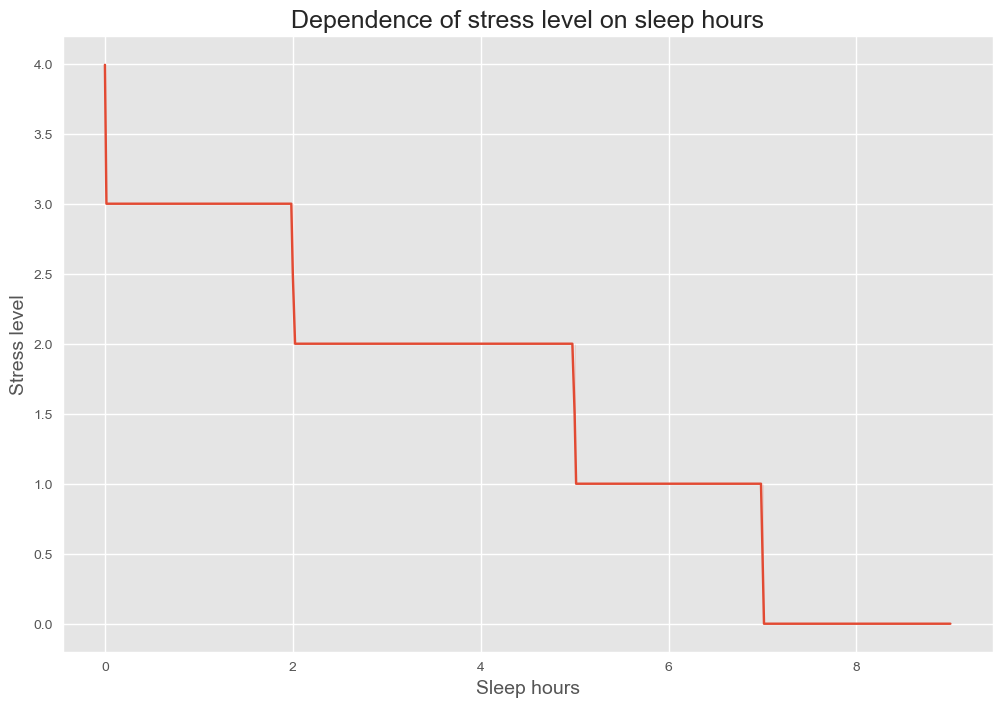

In [81]:
sleep_hours_plot = sns.lineplot(data=df, x='sleeping hours',y='stress level')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleep hours", fontsize=18)
sleep_hours_plot.set_xlabel("Sleep hours", fontsize=14)
sleep_hours_plot.set_ylabel("Stress level", fontsize=14)

In [82]:
df_log4 = df[['sleeping hours','stress level']]
df_log4

,sleeping hours,stress level
0,1.840,3
1,1.552,3
2,7.000,1
3,0.768,3
4,8.248,0
...,...,...
625,3.440,2
626,8.376,0
627,0.000,4
628,6.728,1


In [83]:
# split the dataset into X and y
X_log4 = df_log4[df_log4.columns[:-1]]
y_log4 = df_log4[df_log4.columns[-1]].values

# train test split
X_train_log4, X_test_log4, y_train_log4, y_test_log4 = train_test_split(X_log4, y_log4, test_size=0.3, random_state=42)

# train logistic regression model
model_log4 = LogisticRegression(solver='newton-cg')
model_log4.fit(X_train_log4, y_train_log4)

# predict on test set
y_pred_log4 = model_log4.predict(X_test_log4)

print('confusion matrix:')
print(confusion_matrix(y_test_log4, y_pred_log4), "\n")
accuracy = accuracy_score(y_test_log4, y_pred_log4, normalize=True, sample_weight=None)
all_accuracy.append(accuracy)
print("accuracy:", accuracy)
# print(classification_report(y_test_log4,y_pred_log4))

confusion matrix:
[[38  1  0  0  0]
 [ 0 36  0  0  0]
 [ 0  1 39  1  0]
 [ 0  0  0 29  8]
 [ 0  0  0  0 36]] 

accuracy: 0.9417989417989417


In [84]:
all_accuracy

[1.0, 1.0, 1.0, 0.9576719576719577, 0.9417989417989417]

### Plotting for all features and measuring their accuracy

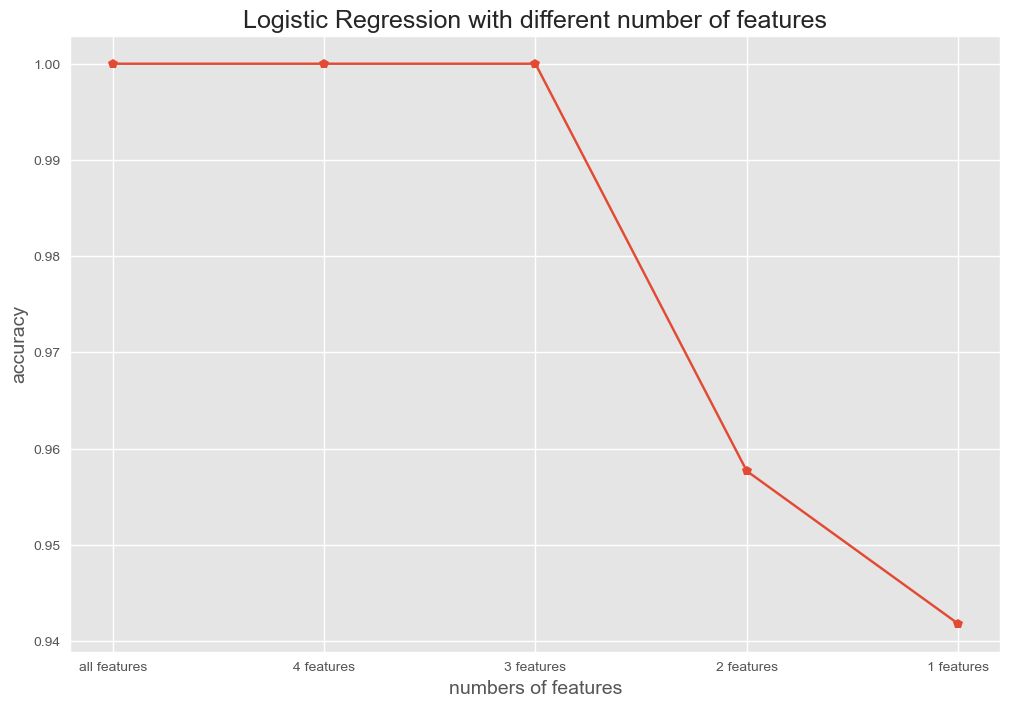

In [86]:
x = ['all features', '4 features', '3 features', '2 features', '1 features']
plt.plot(x, all_accuracy, 'p', linestyle="-")
plt.title("Logistic Regression with different number of features", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('numbers of features', fontsize=14)
plt.show()

In [87]:
algorithms_accuracy=[]
algorithms_accuracy.append(accuracy_score(y_test_log2, y_pred_log2, normalize=True, sample_weight=None))

In [88]:
algorithms_accuracy

[1.0]

**Model that are based on three or more features have 100% accuracy.**

**So we choose the model with three features- `sleeping hours`, `eye movement` and `body temperature`.**

In [90]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,-2.188918,NaN,NaN,NaN
respiration rate,-2.127758,NaN,NaN,NaN
body temperature,3.056327,NaN,NaN,NaN
limb movement,-2.813130,NaN,NaN,NaN
blood oxygen,2.740964,NaN,NaN,NaN
eye movement,-3.750152,NaN,NaN,NaN
sleeping hours,3.768857,NaN,NaN,NaN
heart rate,-2.127758,NaN,NaN,NaN


## 2. Decision Tree

We will check Decision Tree algorithm with different depths

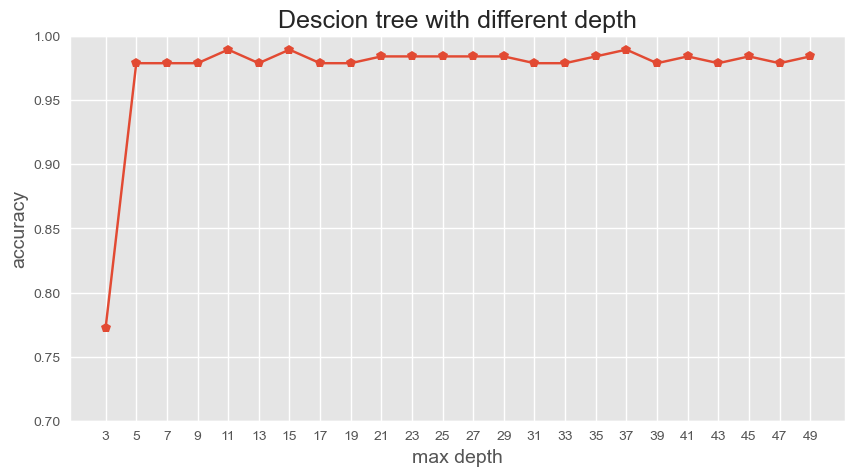

In [93]:
x = [] # depth
accuracy = [] # accuracy score
matrixs = [] # confusion matrix
reports = [] # classification report
models = [] # model with certain depth
for i in range (3,50,2):
    
    # Train Test spilt
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = X_train, X_test, y_train, y_test
    
    #Create the model with i Neighbors
    model_dt = DecisionTreeClassifier(max_depth=i)
    
    # Fit on training data
    model_dt.fit(X_train_dt, y_train_dt)
    
    # Actual class predictions
    y_pred_dt = model_dt.predict(X_test_dt)
    
    x.append(i) #append depth
    accuracy.append(accuracy_score(y_test_dt, y_pred_dt, normalize=True, sample_weight=None)) # append accuracy score
    matrixs.append(confusion_matrix(y_test_dt, y_pred_dt)) # append confusion matrix
    reports.append(classification_report(y_test_dt,y_pred_dt, zero_division=0)) # append classification report
    models.append(model_dt) # append model with a certain depth


#plot the results:
p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Descion tree with different depth", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('max depth', fontsize=14)
plt.xticks(np.arange(3, 50, 2))
plt.yticks(np.arange(0.7, 1.00, 0.05))
plt.show()

In [94]:
best_index = np.argmax(accuracy)   # returns index of max value
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_depth = 3 + best_index*2 # since we start at 3 and step size is 2
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

**Best Tree:**

In [96]:
print("Best Tree with depth", best_depth, "\nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best Tree with depth 11 
with accuracy 0.9894179894179894 

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.97      0.99        36
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.99        37
           4       0.97      1.00      0.99        36

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



In [97]:
best_matrix

array([[39,  0,  0,  0,  0],
       [ 1, 35,  0,  0,  0],
       [ 0,  0, 41,  0,  0],
       [ 0,  0,  0, 36,  1],
       [ 0,  0,  0,  0, 36]])

Text(0.5, 1.0, 'Confusion matrix')

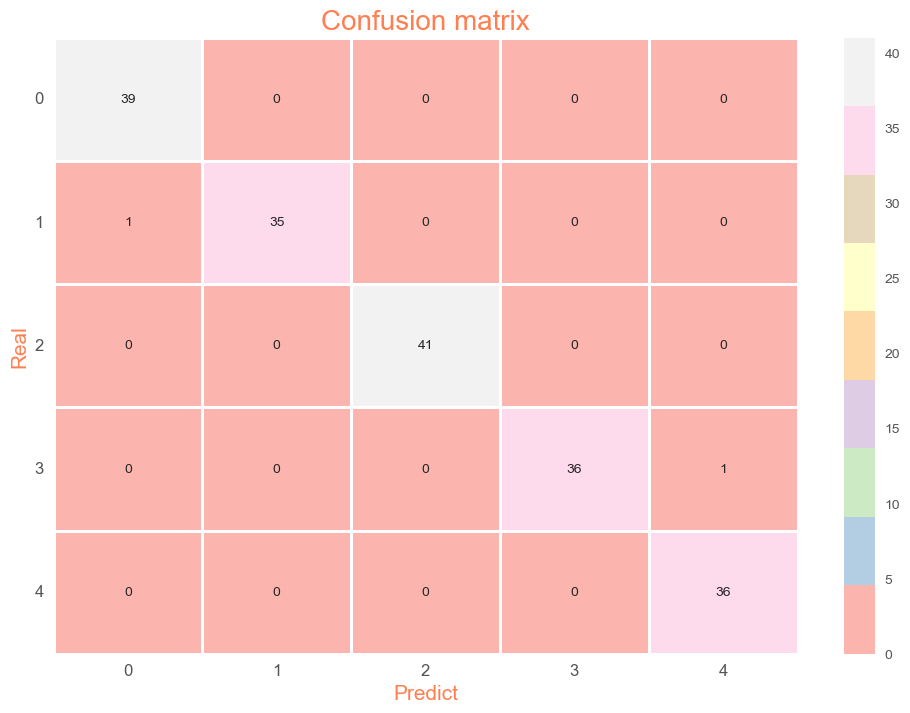

In [98]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1, annot=True)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

**Feature importance**

In [100]:
feature_list

array(['snoring rate', 'respiration rate', 'body temperature',
       'limb movement', 'blood oxygen', 'eye movement', 'sleeping hours',
       'heart rate'], dtype=object)

In [101]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Descion Tree'] = importances # append decision tree model coefficient/features to df_importance

# Map column with feature importance from decision tree model
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_dt = []
features_list_order = []
for v, i in feature_importances: #v is column name and i is feature value
    importances_dt.append(i)
    features_list_order.append(v)

In [102]:
importances_dt, features_list_order

([0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0],
 ['snoring rate',
  'body temperature',
  'limb movement',
  'sleeping hours',
  'respiration rate',
  'blood oxygen',
  'eye movement',
  'heart rate'])

Text(0.5, 1.0, 'Features Importances')

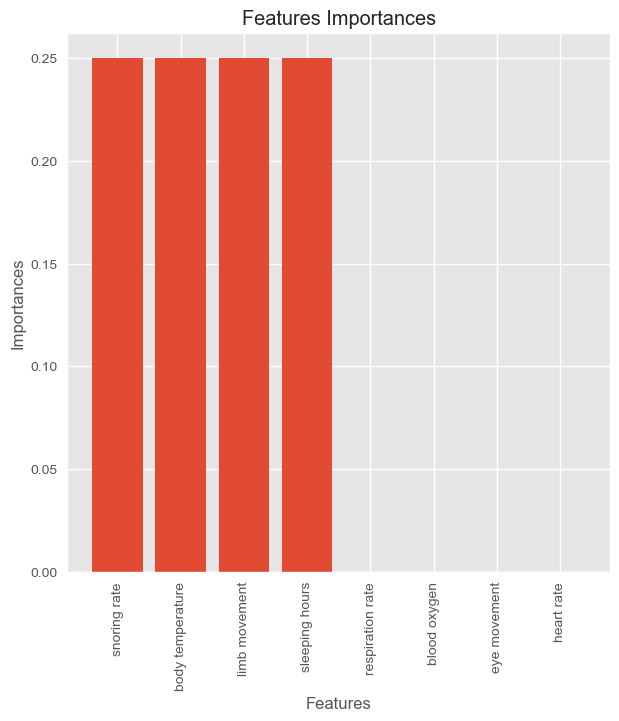

In [103]:
p_dt = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.6, 0.05))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_dt, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features')
plt.title('Features Importances')

In [104]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,-2.188918,0.247166,NaN,NaN
respiration rate,-2.127758,0.000000,NaN,NaN
body temperature,3.056327,0.247843,NaN,NaN
limb movement,-2.813130,0.253855,NaN,NaN
blood oxygen,2.740964,0.000000,NaN,NaN
eye movement,-3.750152,0.000000,NaN,NaN
sleeping hours,3.768857,0.251135,NaN,NaN
heart rate,-2.127758,0.000000,NaN,NaN


## 3. Random Forest

We will check Random Forest algorithm with different max-features and different number of trees.

## Different max_features

### max_features = None (All features)

In [109]:
# Train Test spilt
X_train_ran, X_test_ran, y_train_ran, y_test_ran = X_train, X_test, y_train, y_test

In [110]:
# Create the model
model_ran1 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features=None)

# Fit on training data
model_ran1.fit(X_train_ran, y_train_ran)

# Actual class predictions
y_pred_ran1 = model_ran1.predict(X_test_ran)

print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran1), "\n")
# print(classification_report(y_test_ran,y_pred_ran1))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran1, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 0 35  1  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9947089947089947


**We missed 1 sample (number of 1's represent missing samples).**

### max_features = sqrt

In [113]:
# Create the model
model_ran2 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
# Fit on training data
model_ran2.fit(X_train_ran, y_train_ran)
# Actual class predictions
y_pred_ran2 = model_ran2.predict(X_test_ran)
print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran2), "\n")
# print(classification_report(y_test_ran,y_pred_ran2))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran2, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 0 35  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9894179894179894


**We missed 1 sample**

### max_features = log2

In [116]:
# Create the model
model_ran3 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'log2')

# Fit on training data
model_ran3.fit(X_train_ran, y_train_ran)

# Actual class predictions
y_pred_ran3 = model_ran3.predict(X_test_ran)

print('confusion matrix:\n')
print(confusion_matrix(y_test_ran, y_pred_ran3), "\n")
# print(classification_report(y_test_ran,y_pred_ran3))
print("accuracy:", accuracy_score(y_test_ran, y_pred_ran3, normalize=True, sample_weight=None))

confusion matrix:

[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 36]] 

accuracy: 0.9894179894179894


**We missed 2 samples**

• We can see that when we consider all the featuers we miss just one sample - the best result, with 99% accuracy.

• **We will choose the model to consider all features.**

## Different Number of Trees

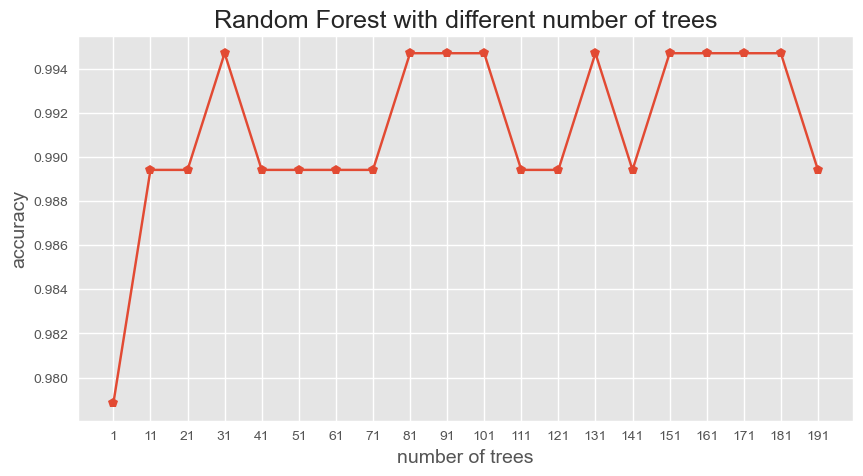

In [120]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range (1,200,10):
    
    # Create the model
    model_ran = RandomForestClassifier(n_estimators=i, bootstrap = True, max_features=None)
    models.append(model_ran)

    # Fit on training data
    model_ran.fit(X_train_ran, y_train_ran)

    # Actual class predictions
    y_pred_ran = model_ran.predict(X_test_ran)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ran, y_pred_ran))
    reports.append(classification_report(y_test_ran,y_pred_ran, zero_division=0))
    models.append(model_ran)
    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Random Forest with different number of trees", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('number of trees', fontsize=14)
plt.xticks(np.arange(1, 201, 10))
# plt.yticks(np.arange(0.9, 1.05, 0.05))
plt.show()

In [121]:
best_index = np.argmax(accuracy)   # start with index 0
best_model = models[best_index]
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_numTrees = 1 + best_index*10
algorithms_accuracy.append(accuracy[best_index])

### Best Forest

In [123]:
print("Best Random Forest with", best_numTrees, " trees\nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best Random Forest with 31  trees
with accuracy 0.9947089947089947 

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.97      0.99        36
           2       0.98      1.00      0.99        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           0.99       189
   macro avg       1.00      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



Text(0.5, 1.0, 'Confusion matrix')

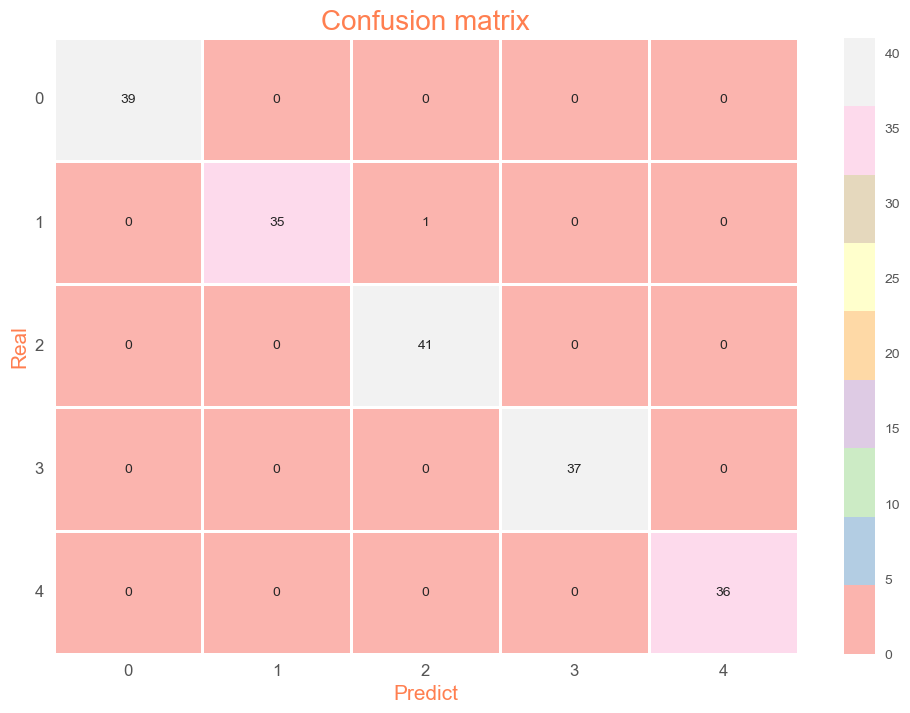

In [124]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1, annot=True)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

In [125]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Random Forest'] = importances

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_ran = []
features_list_order = [] #only those features which contribute or have some weights
for v, i in feature_importances:
    importances_ran.append(i)
    features_list_order.append(v)

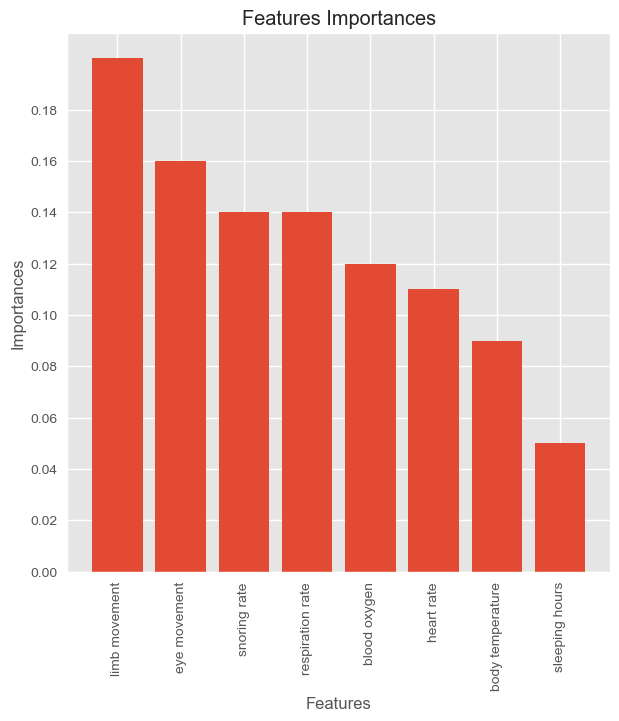

In [126]:
p_ran = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.2, 0.02))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_ran, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features'); plt.title('Features Importances');

Now we will try to use less features- throw the less important features:

--------Random Forest with 8 most important features--------

The chosen featurs:
 ['limb movement', 'eye movement', 'snoring rate', 'respiration rate', 'blood oxygen', 'heart rate', 'body temperature', 'sleeping hours']
Accuracy: 0.9947089947089947 


--------Random Forest with 7 most important features--------

The chosen featurs:
 ['limb movement', 'eye movement', 'snoring rate', 'respiration rate', 'blood oxygen', 'heart rate', 'body temperature']
Accuracy: 0.9841269841269841 


--------Random Forest with 6 most important features--------

The chosen featurs:
 ['limb movement', 'eye movement', 'snoring rate', 'respiration rate', 'blood oxygen', 'heart rate']
Accuracy: 0.9841269841269841 


--------Random Forest with 5 most important features--------

The chosen featurs:
 ['limb movement', 'eye movement', 'snoring rate', 'respiration rate', 'blood oxygen']
Accuracy: 0.9841269841269841 


--------Random Forest with 4 most important features--------

The chosen featurs:
 ['limb moveme

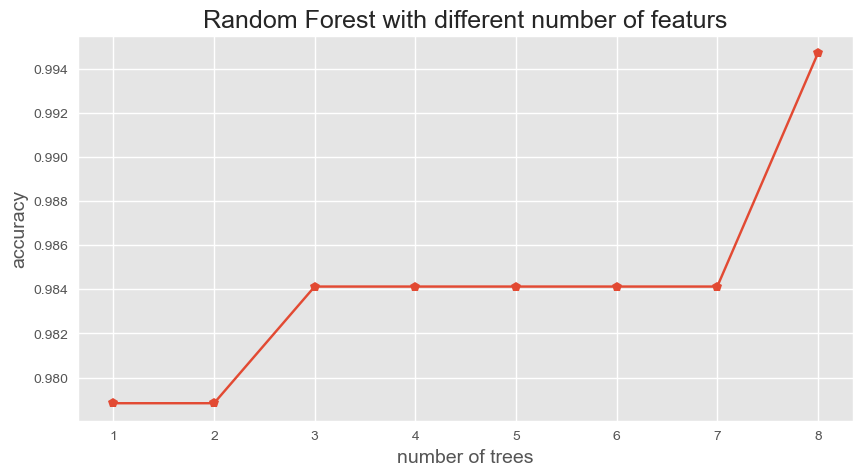

In [128]:
x = []
accuracy = []
matrixs = []
reports = []
for i in range (8,0,-1):
    
    # Create new data, with the most importent i-features 
    X_ran_new = df[features_list_order[:i]] #only those features which contribute or have some weights
    y_ran_new = df['stress level'] 

    # train test split
    X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(X_ran_new, y_ran_new, test_size=0.3, random_state=42)
    
    # Create the model
    model_ran = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features=None)
    models.append(model_ran)

    # Fit on training data
    model_ran.fit(X_train_ran, y_train_ran)

    # Actual class predictions
    y_pred_ran = model_ran.predict(X_test_ran)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ran, y_pred_ran))
    reports.append(classification_report(y_test_ran,y_pred_ran, zero_division=0))
    
    print('--------Random Forest with', i, "most important features--------\n")
    print("The chosen featurs:\n", features_list_order[:i])
    print("Accuracy:", accuracy_score(y_test_ran, y_pred_ran, normalize=True, sample_weight=None),"\n\n")

p = plt.figure(figsize=(10, 5))
plt.plot(x, accuracy, 'p', linestyle="-")
plt.title("Random Forest with different number of featurs", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('number of trees', fontsize=14)
plt.xticks(np.arange(1, 9, 1))
plt.show()

Surprisingly- Taking all features doesn't give the highest accuracy, but still make sense with the previous observation because it good to take almost all features (and taking all fetures still cause better result then taking squrt/log of the features).

In [130]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,-2.188918,0.247166,0.135455,NaN
respiration rate,-2.127758,0.000000,0.139050,NaN
body temperature,3.056327,0.247843,0.087898,NaN
limb movement,-2.813130,0.253855,0.202764,NaN
blood oxygen,2.740964,0.000000,0.116006,NaN
eye movement,-3.750152,0.000000,0.159499,NaN
sleeping hours,3.768857,0.251135,0.046314,NaN
heart rate,-2.127758,0.000000,0.113014,NaN


## 4. KNN

We will check KNN algorithm with different numbers of neighbors

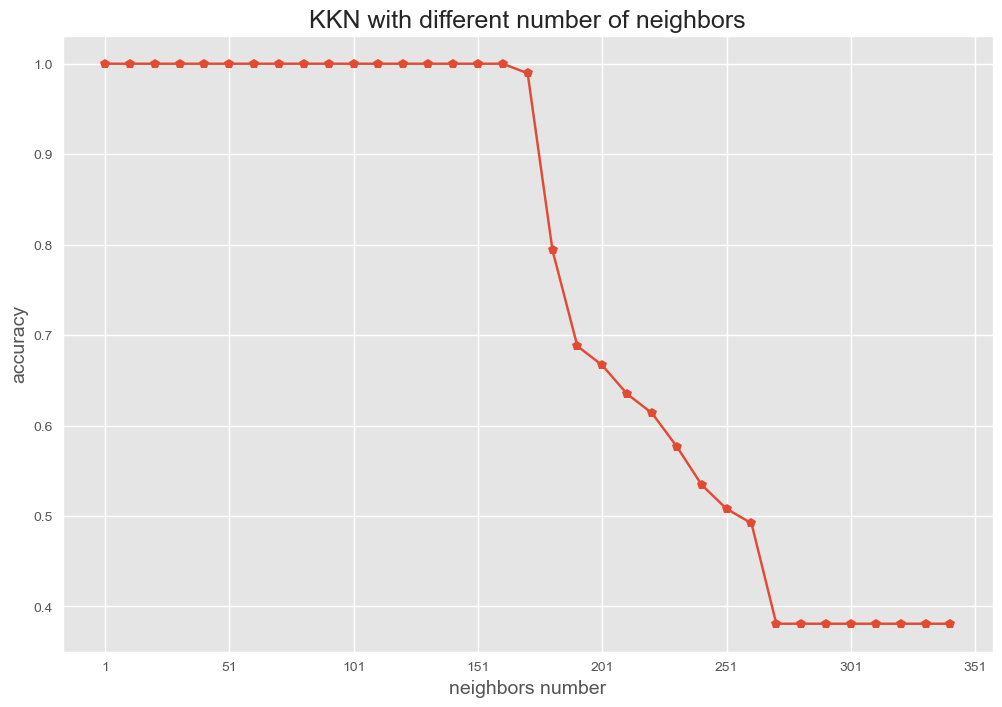

In [133]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range (1,350,10):
    
    # Train Test spilt
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = X_train, X_test, y_train, y_test
    
    #Create the model with i Neighbors
    model_knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit on training data
    model_knn.fit(X_train_knn, y_train_knn)
    
    # Actual class predictions
    y_pred_knn = model_knn.predict(X_test_knn)
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_knn, y_pred_knn))
    reports.append(classification_report(y_test_knn,y_pred_knn, zero_division=0))
    models.append(model_knn)#best_model = models[best_index]

    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

plt.plot(x, accuracy, 'p', linestyle="-")
plt.xticks(np.arange(1, 352, 50))
plt.title("KKN with different number of neighbors", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('neighbors number', fontsize=14)
plt.show()

**KNN get 100% accuracy when it based on 1-161 neighbors.**

**The chosen model will based on 1 neighbor.** (since it attains max at 1 and then start to reduce slightly)

In [135]:
best_index = np.argmax(accuracy)   # start with index 0
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_neighbors = 1 + best_index*2
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

print("Best KNN with ", best_neighbors, "neighbors. \nwith accuracy", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

Best KNN with  1 neighbors. 
with accuracy 1.0 

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



Text(0.5, 1.0, 'Confusion matrix')

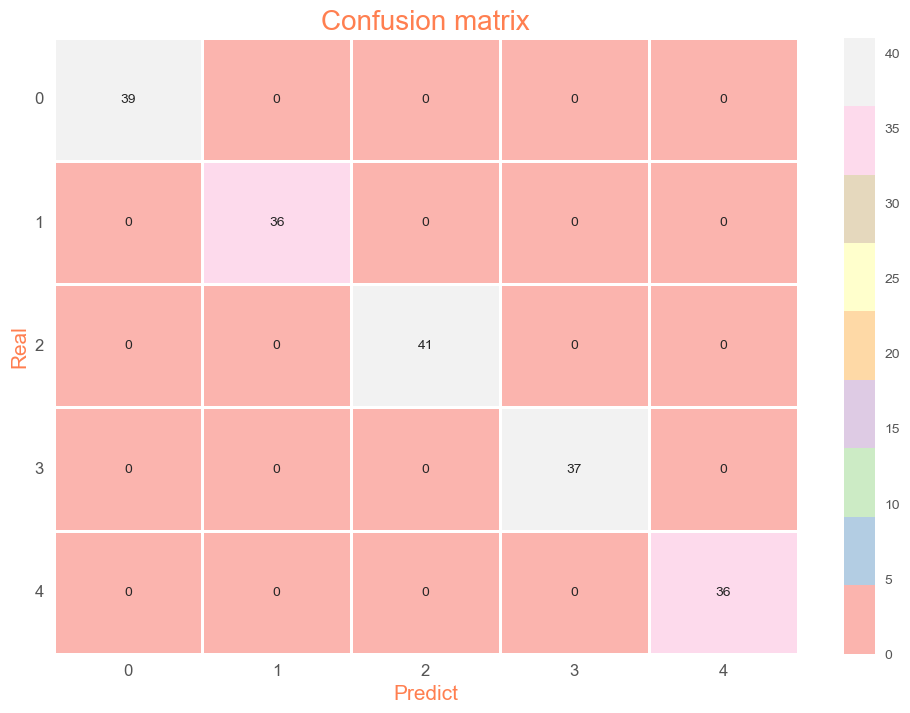

In [136]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1,annot=True)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

## 5. ADABoost

We will check Adaboost algorithm with different numbers of estimators

--------Adaboost with 1 estimators--------

confusion matrix:
[[ 0 39  0  0  0]
 [ 0 36  0  0  0]
 [ 0 41  0  0  0]
 [ 0 37  0  0  0]
 [ 0  1  0  0 35]]

accuracy: 0.37566137566137564 


--------Adaboost with 2 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 35  0  0  0]
 [ 0 41  0  0  0]
 [ 0 36  0  0  1]
 [ 0  0  0  0 36]]

accuracy: 0.582010582010582 


--------Adaboost with 3 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  0  1  0]
 [ 0  0  0 41  0]
 [ 0  0  0 36  1]
 [ 0  0  0  0 36]]

accuracy: 0.7671957671957672 


--------Adaboost with 4 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  1 35]]

accuracy: 0.9788359788359788 


--------Adaboost with 5 estimators--------

confusion matrix:
[[39  0  0  0  0]
 [ 1 34  1  0  0]
 [ 0  0 40  1  0]
 [ 0  0  0 36  1]
 [ 0  0  0  0 36]]

accuracy: 0.9788359788359788 


--------Adaboost with 6 estimators--------

confusion matrix:
[[39  0 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

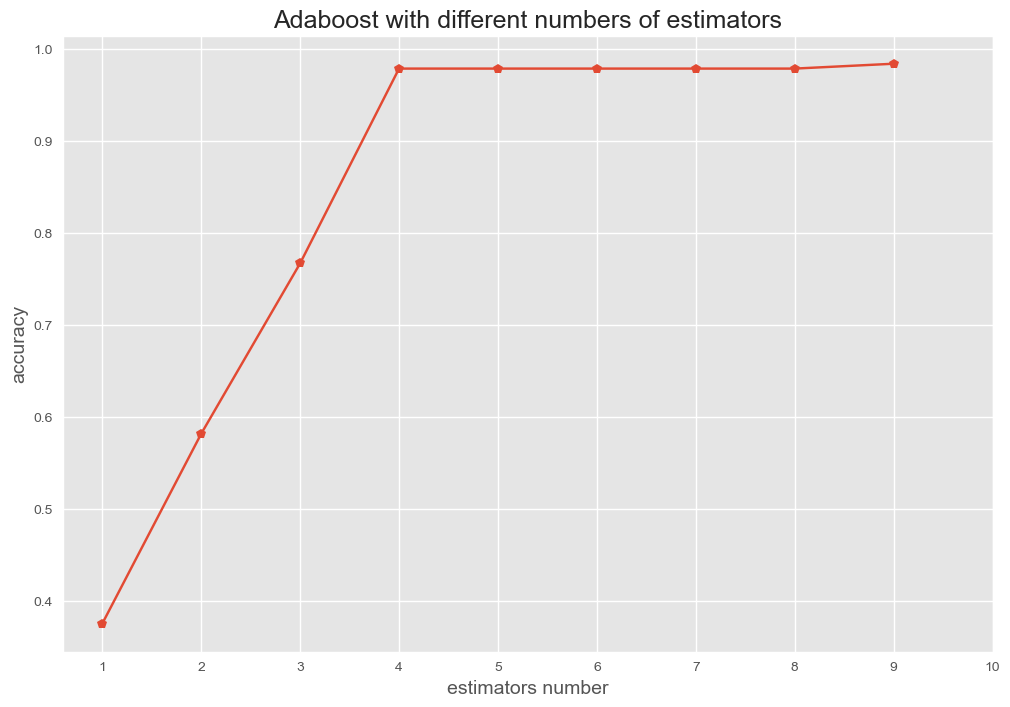

In [139]:
x = []
accuracy = []
matrixs = []
reports = []
models = []
for i in range(1,10):

    # Train Test spilt
    X_train_ada, X_test_ada, y_train_ada, y_test_ada = X_train, X_test, y_train, y_test

    #Create the adaboost model
    model_ada = AdaBoostClassifier( n_estimators=i, learning_rate=0.1) 

    # Fit on training data
    model_ada.fit(X_train_ada, y_train_ada)

    # Actual class predictions
    y_pred_ada = model_ada.predict(X_test_ada)

    print('--------Adaboost with', i, "estimators--------\n")
    print('confusion matrix:')
    print(confusion_matrix(y_test_ada, y_pred_ada))
    print("\naccuracy:", accuracy_score(y_test_ada, y_pred_ada, normalize=True, sample_weight=None),"\n\n")
    
    x.append(i)
    accuracy.append(accuracy_score(y_test_ada, y_pred_ada, normalize=True, sample_weight=None))
    matrixs.append(confusion_matrix(y_test_ada, y_pred_ada))
    reports.append(classification_report(y_test_ada,y_pred_ada, zero_division=0))
    models.append(model_ada)
    
    #print("Accuracy with",i , "Neighbors:", accuracy_score(y_test_knn, y_pred_knn, normalize=True, sample_weight=None))

plt.plot(x, accuracy, 'p', linestyle="-")
plt.xticks(np.arange(1, 11, 1))
plt.title("Adaboost with different numbers of estimators", fontsize=18)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('estimators number', fontsize=14)
plt.show()

• We can see that the accuracy score doesnt change in models that baised on 4 or more features

• We assume that the reason is that Adaboost gives zero weight to the four last importent features

In [141]:
best_index = np.argmax(accuracy)   # start with index 0
best_matrix = matrixs[best_index]
best_reports = reports[best_index]
best_estimators = best_index 
best_model = models[best_index]
algorithms_accuracy.append(accuracy[best_index])

In [142]:
print("The best Adaboost is with ", best_estimators, "max-estimators\naccuracy:", accuracy[best_index], "\n")
print("classification report:\n", best_reports)

The best Adaboost is with  8 max-estimators
accuracy: 0.9841269841269841 

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        36
           2       0.98      0.98      0.98        41
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



Text(0.5, 1.0, 'Confusion matrix')

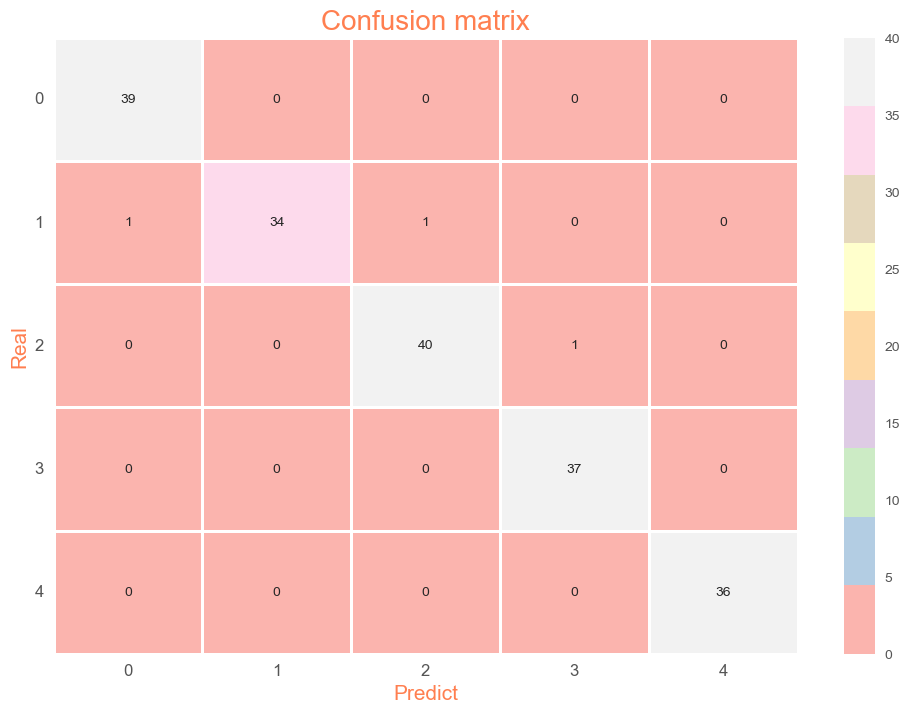

In [143]:
df_matrix=pd.DataFrame(data=best_matrix,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1,annot=True)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

In [144]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
df_importance['Adaboost'] = importances

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
importances_ada = []
features_list_order = []
for v, i in feature_importances:
    importances_ada.append(i)
    features_list_order.append(v)

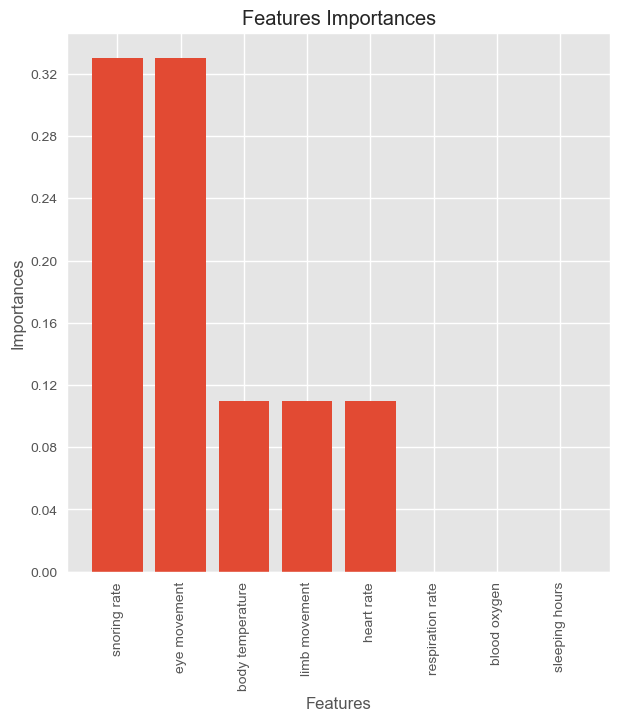

In [145]:
p_ada = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 0.54, 0.04))
# plt.yticks(np.arange(0.05, 0.15, 0.01))

x_values = list(range(len(feature_list)))
plt.bar(x_values, importances_ada, orientation = 'vertical')
plt.xticks(x_values, features_list_order, rotation='vertical')
plt.ylabel('Importances'); plt.xlabel('Features'); plt.title('Features Importances');

As we assumed, Adaboost gives non-zero weight just for four features

In [147]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,-2.188918,0.247166,0.135455,0.333333
respiration rate,-2.127758,0.000000,0.139050,0.000000
body temperature,3.056327,0.247843,0.087898,0.111111
limb movement,-2.813130,0.253855,0.202764,0.111111
blood oxygen,2.740964,0.000000,0.116006,0.000000
eye movement,-3.750152,0.000000,0.159499,0.333333
sleeping hours,3.768857,0.251135,0.046314,0.000000
heart rate,-2.127758,0.000000,0.113014,0.111111


In [148]:
all_accuracy

[1.0, 1.0, 1.0, 0.9576719576719577, 0.9417989417989417]

# 7. Analyzing different parametres that affect stress level

We get 100% accuracy in the three algorithms- **Logistic Reggression**, **Descion Tree** and **Random Forest**.

Text(0.5, 1.0, 'Algorithm')

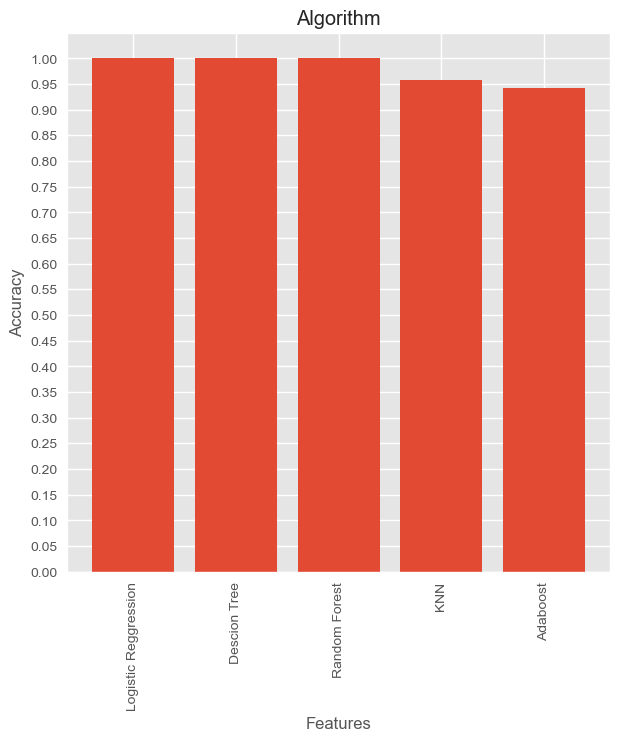

In [151]:
p = plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 1.05, 0.05))
# plt.yticks(np.arange(0.05, 0.15, 0.01))
agorithms = ['Logistic Reggression', 'Descion Tree', 'Random Forest', 'KNN', 'Adaboost']

x_values = list(range(len(agorithms)))
plt.bar(x_values, all_accuracy, orientation = 'vertical')
plt.xticks(x_values, agorithms, rotation='vertical')
plt.ylabel('Accuracy'); plt.xlabel('Features')
plt.title('Algorithm')

## >>Which parameter has the most effect on stress level?

To understand which is the most important parameters when we want to have a low stress level, we can look in the different models and see which features each of them consider to be the most important:

In [154]:
df_importance

,Logistic Reggression,Descion Tree,Random Forest,Adaboost
snoring rate,-2.188918,0.247166,0.135455,0.333333
respiration rate,-2.127758,0.000000,0.139050,0.000000
body temperature,3.056327,0.247843,0.087898,0.111111
limb movement,-2.813130,0.253855,0.202764,0.111111
blood oxygen,2.740964,0.000000,0.116006,0.000000
eye movement,-3.750152,0.000000,0.159499,0.333333
sleeping hours,3.768857,0.251135,0.046314,0.000000
heart rate,-2.127758,0.000000,0.113014,0.111111


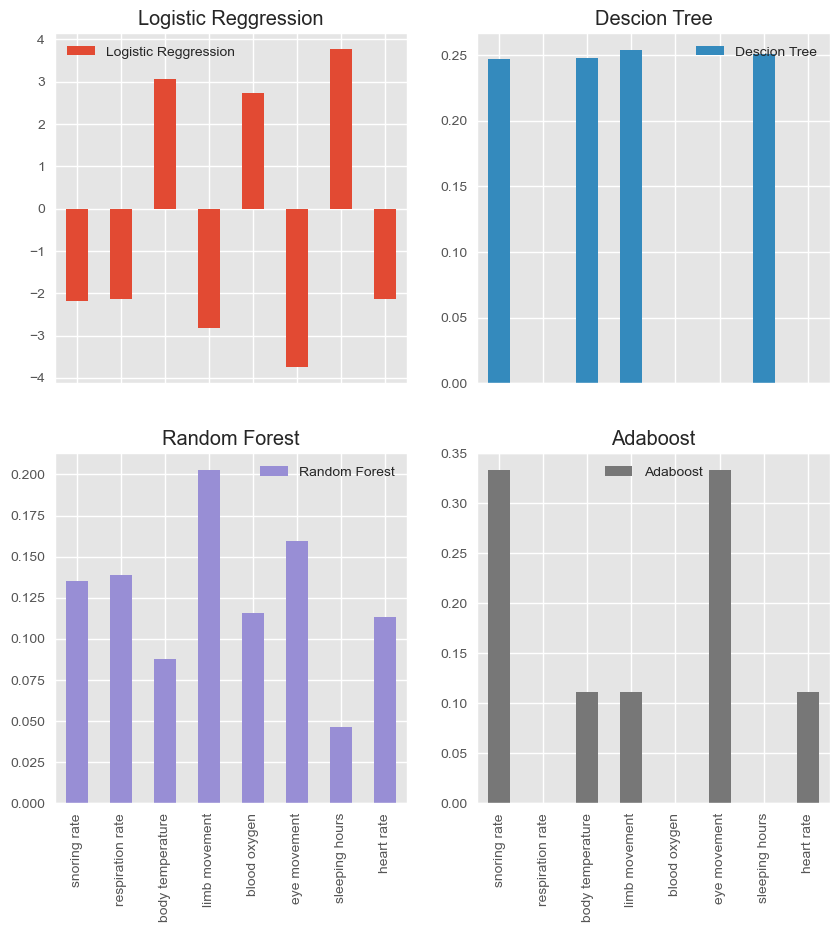

In [155]:
p = df_importance.plot(subplots=True, kind='bar', layout=(2,2), figsize=(10, 10))

<Axes: >

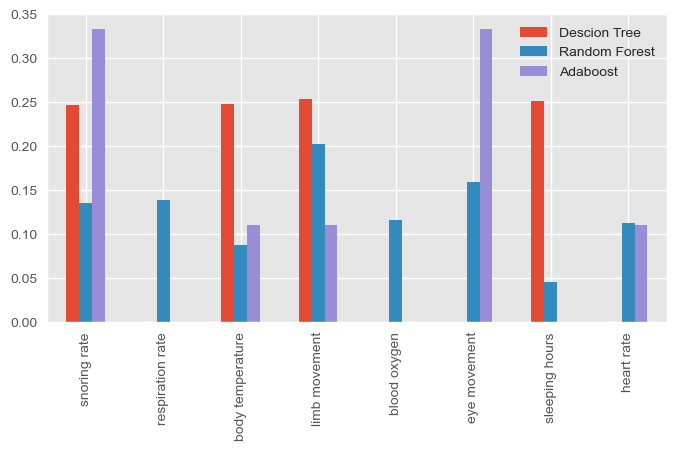

In [156]:
df_importance_withoutLR = df_importance.drop('Logistic Reggression', axis=1, inplace=False)
df_importance_withoutLR.plot(kind='bar', figsize=(8, 4))

We assumed that all models will consider **sleeping hours** as the most importent parameter, but surprisingly we see that:

1. `Logistic Regression (based on all the features)`: The most importent feautures are **sleeping hours** and **eye movement**.

    There is a <ins>high-correlation</ins> between sleeping hours and stress level and a <ins>cross-correlation</ins> between eye movement and stress level.


2. `Decision Tree (based on three features)`: The important features are **limb movement**, **blood oxygen** and **eye movement**. 

    The most important one is blood oxygen.
    
    
3. `Random Forest (based on all features)`: Considers **heart rate**, **body temperature**, **heart rate** as important features and **body temperature** as the most important one.


4. `ADABoost (based on four features)`: Considers **snoring rate**, **limb movement**, **eye movement** and **snoring rate** as the most important features.

## >>Should we prefer long and low quality sleep, or short but hight quality sleep?

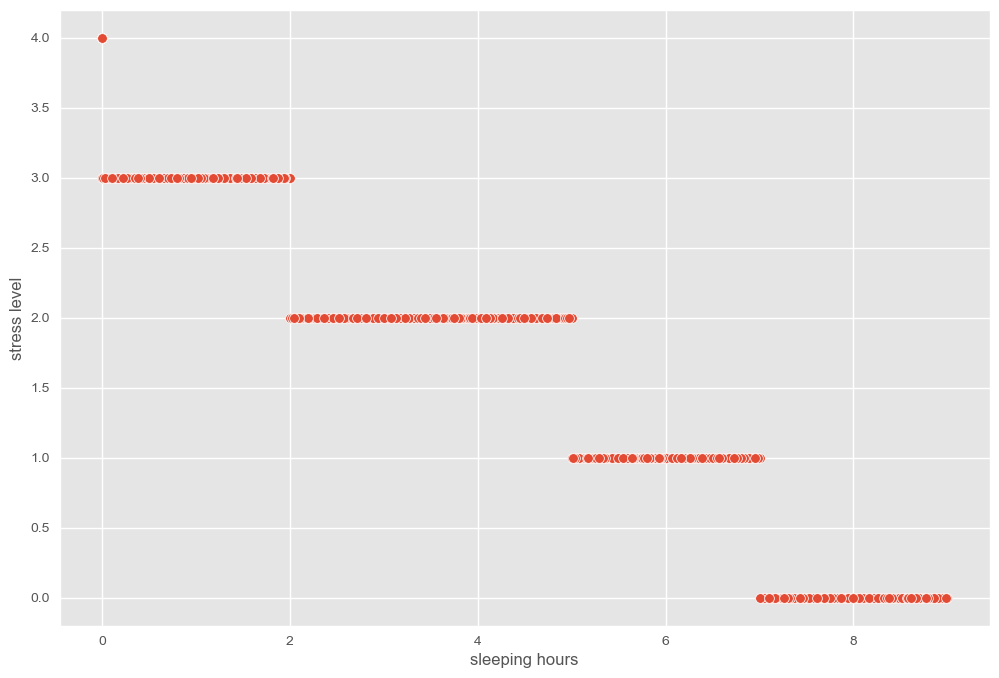

In [159]:
# ax = sns.regplot(x='sleeping hours', y='stress level', data=df)
ax = sns.scatterplot(data=df, x='sleeping hours', y='stress level')

**We can see that for getting stress level of 0, 'sleeping hours' need to be at least 7 hours.**

## 1. Answer by Logistic Regression model

Lets look at the Logistic Regression model. By it, 'sleeping hours' is the most important feature with the heaviest weight. The next feature with the highest weight is 'eye movement'. 

We will define quality sleep by this feature, and compare between long & low quality sleep vs short & high quality sleep.

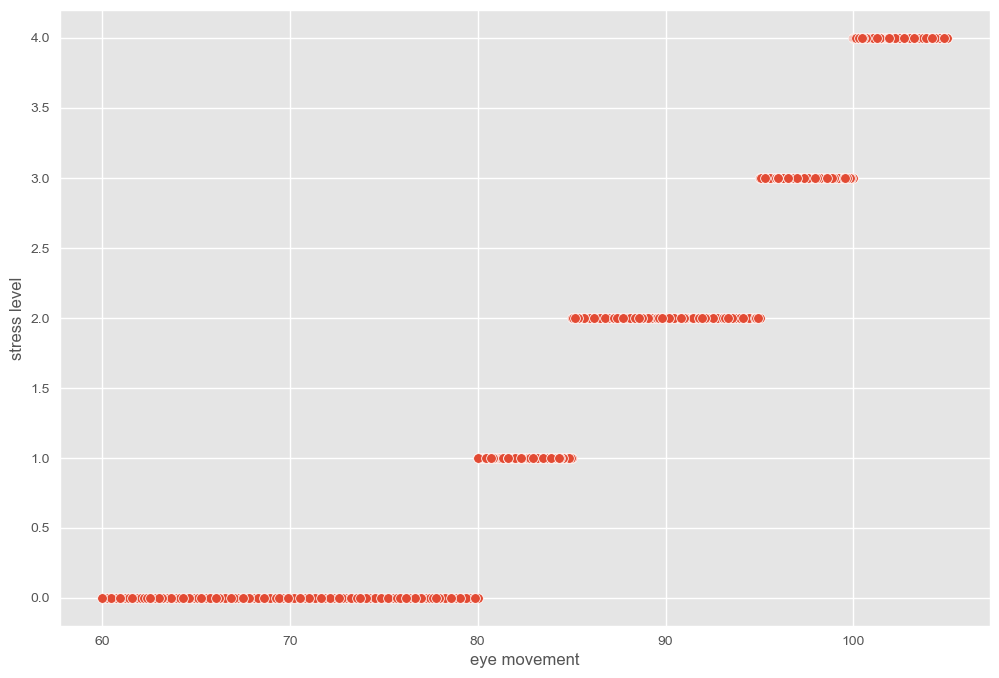

In [163]:
# sns.scatterplot(data=df, x='eye movement', y='body temperature', hue='stress level')
ax = sns.scatterplot(data=df, x='eye movement', y='stress level')

**We can see that for getting stress level of 0, 'eye movement' value should be between 60-80.**

In [165]:
# create data from the chosen features:
df_compereLR =  df[[ 'eye movement','stress level']]

# define long sleeping:
df_compereLR.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compereLR.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# define quality sleeping:
df_compereLR.loc[df['eye movement'] < 80, 'Quality'] = 'good eye movement'
df_compereLR.loc[df['eye movement'] >= 80, 'Quality'] = 'bad eye movement'


df_compereLR.groupby(['stress level','Quality', 'Sleeping hours']).count()

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3024341910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compereLR.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3024341910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compereLR.loc[df['eye movement'] < 80, 'Quality'] = 'good eye movement'


eye movement
stress level Quality           Sleeping hours              
0            bad eye movement  long                       1
             good eye movement long                     125
1            bad eye movement  long                       1
                               short                    125
2            bad eye movement  short                    126
3            bad eye movement  short                    126
4            bad eye movement  short                    126

### We observe that, long sleeping hours with good eye movement results in low stress level and better quality of sleep.

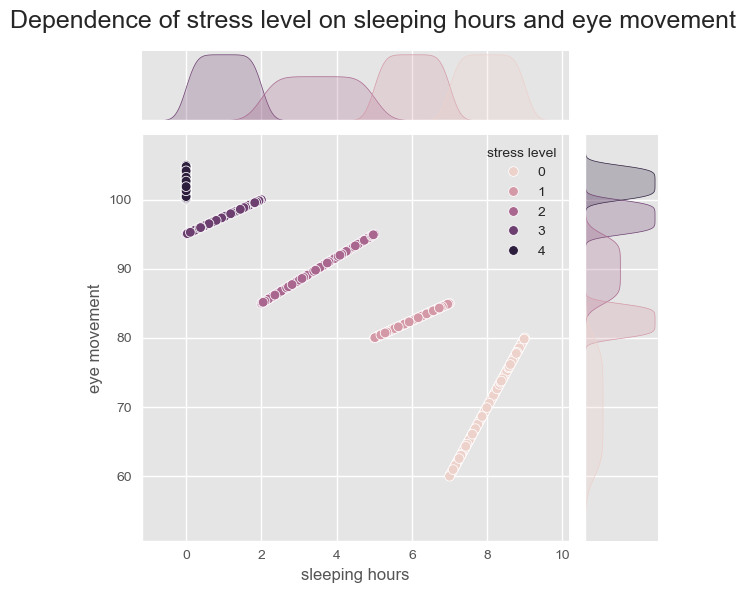

In [167]:
p = sns.jointplot(x='sleeping hours', y='eye movement', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and eye movement", fontsize=18)
p.fig.tight_layout()

### We can see that the more you sleep, the less you have eye movement (and the contrary).

## 2. Answer by Decision Tree model

Lets try this process with Decision Tree model (that doesn't consider 'sleeping hours' as the most important feature).

The most importent feature is 'blood oxygen'.

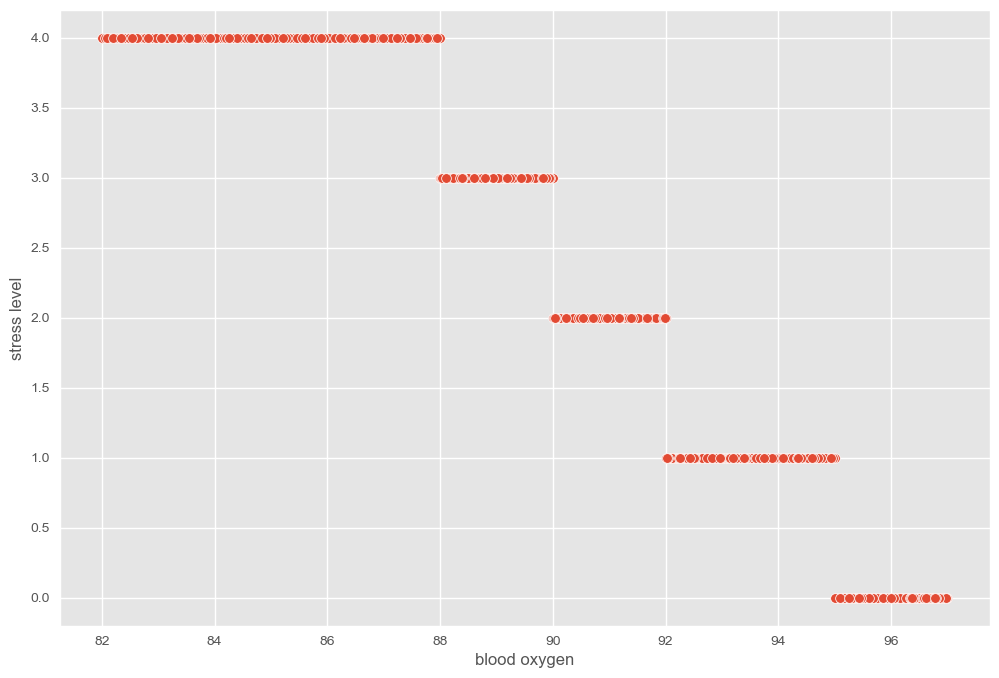

In [171]:
# sns.scatterplot(data=d, x='respiration rate', y='blood oxygen', hue='stress level')
ax = sns.scatterplot(data=df, x='blood oxygen', y='stress level')

**'blood oxygen' between 95-87 indicates minimum stress level**

In [173]:
# create data from the chosen features:
df_compereDT =  df[['blood oxygen','stress level']]

# # define long sleeping:
df_compereDT.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compereDT.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# define quality sleeping:
df_compereDT.loc[df['blood oxygen'] < 95, 'Quality'] = 'bad blood oxygen level'
df_compereDT.loc[df['blood oxygen'] >= 95, 'Quality'] = 'good blood oxygen level'
# df_compereRAN.loc[(df_compereRAN['respiration rate'] < 18) & (df_compereRAN['blood oxygen'] >= 95), 'quality'] = True
# df_compereRAN.loc[(df_compereRAN['respiration rate'] >= 18) & (df_compereRAN['blood oxygen'] < 95), 'quality'] = False

df_compereDT.groupby(['stress level','Quality', 'Sleeping hours']).count()

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3188078248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compereDT.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3188078248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compereDT.loc[df['blood oxygen'] < 95, 'Quality'] = 'bad blood oxygen level'


blood oxygen
stress level Quality                 Sleeping hours              
0            good blood oxygen level long                     126
1            bad blood oxygen level  short                    125
             good blood oxygen level long                       1
2            bad blood oxygen level  short                    126
3            bad blood oxygen level  short                    126
4            bad blood oxygen level  short                    126

**Long sleeping hours indicate good blood oxygen level and minimizes stress**

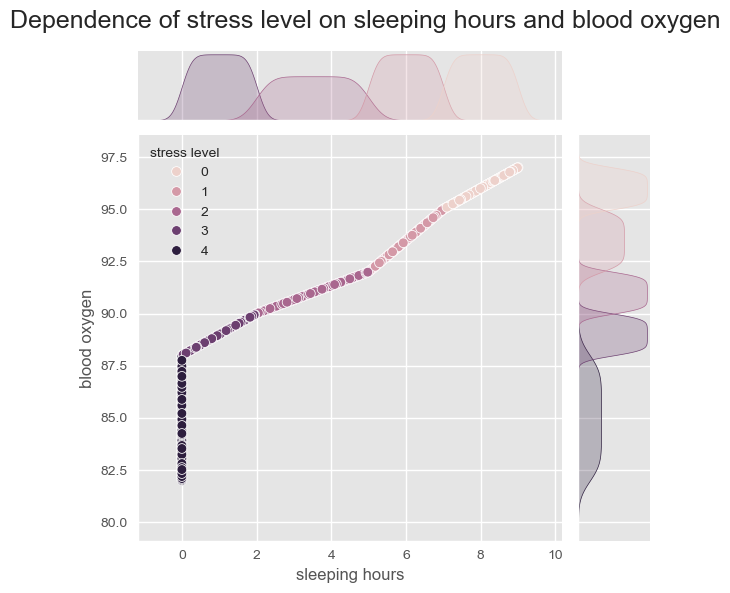

In [175]:
p = sns.jointplot(x='sleeping hours', y='blood oxygen', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and blood oxygen", fontsize=18)
p.fig.tight_layout()

### We can see that the more you sleep, the better your blood oxygen level.

## 3. Answer by Random Forest model

Random Forest model considers 'body temperature' as the most important feature.

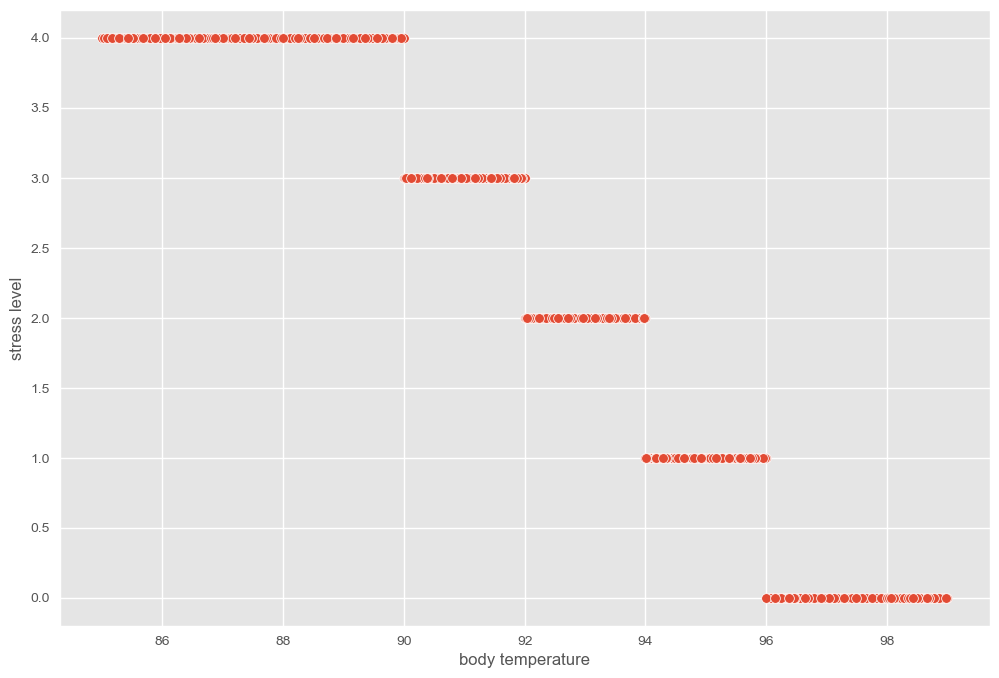

In [179]:
ax = sns.scatterplot(data=df, x='body temperature', y='stress level')

**body temperature above 96(F) indicates minimum stress level**

In [181]:
# create data from the chosen features:
df_compare_dt =  df[['body temperature', 'stress level']]

# # define long sleeping:
df_compare_dt.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compare_dt.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# # define quality sleeping:
df_compare_dt.loc[ df['body temperature'] >= 96, 'Quality'] = 'good body temperature'
df_compare_dt.loc[df['body temperature'] < 96, 'Quality'] = 'bad body temperature'

df_compare_dt.groupby(['stress level','Quality','Sleeping hours']).count()

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/2673390798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare_dt.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/2673390798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare_dt.loc[ df['body temperature'] >= 96, 'Quality'] = 'good body temperature'


body temperature
stress level Quality               Sleeping hours                  
0            good body temperature long                         126
1            bad body temperature  short                        125
             good body temperature long                           1
2            bad body temperature  short                        126
3            bad body temperature  short                        126
4            bad body temperature  short                        126

**Long sleeping hours and good body temperature indicate minimum stress level**

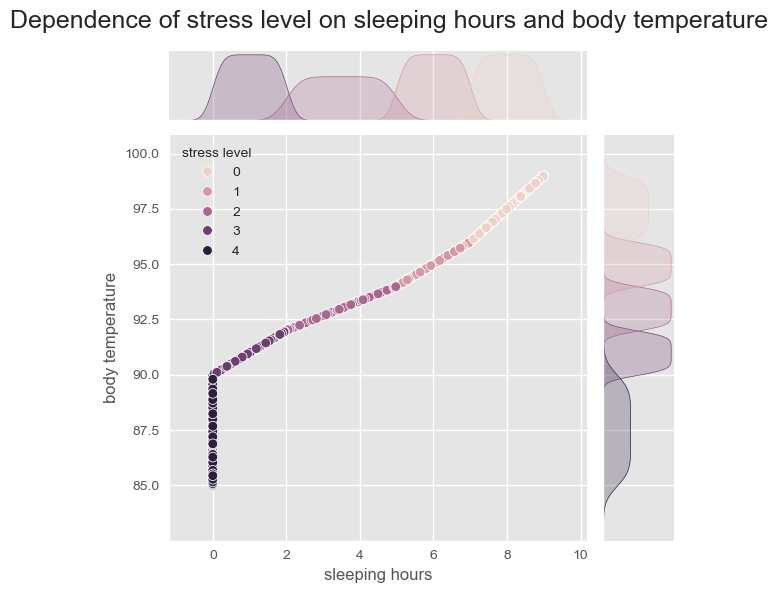

In [183]:
p = sns.jointplot(x='sleeping hours', y='body temperature', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and body temperature", fontsize=18)
p.fig.tight_layout()

### We can see, the more you sleep the better your body temperature.

## 4. Answer by Adaboost model

The nost importent feature is- 'snoring rate' feature.

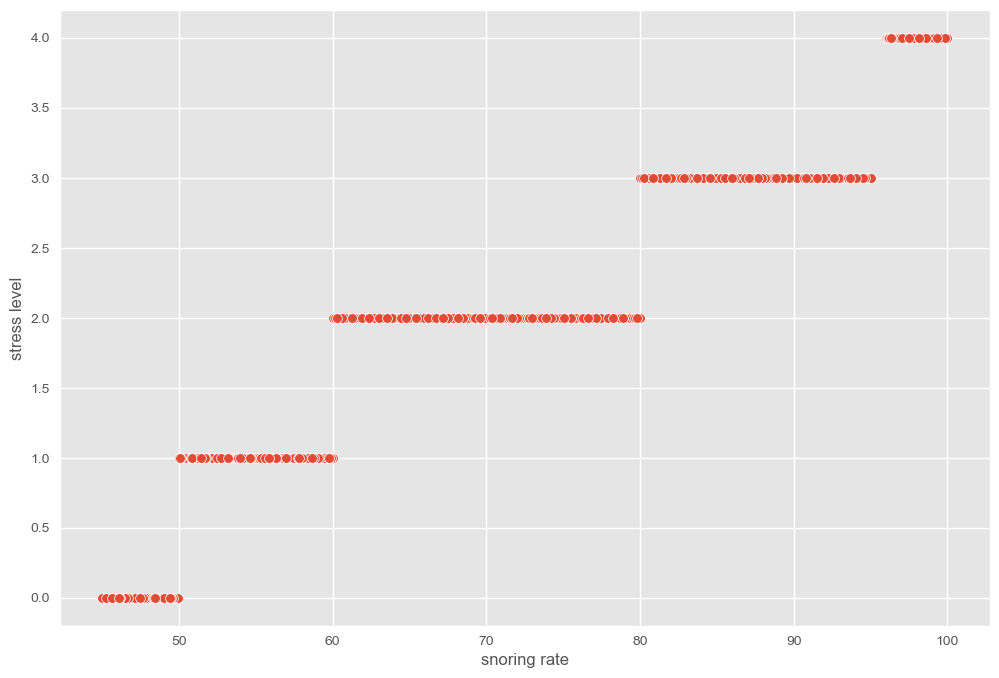

In [187]:
ax = sns.scatterplot(data=df, x='snoring rate', y='stress level')


In [188]:
# create data from the chosen features:
df_compareAda =  df[['snoring rate', 'stress level']]

# # define long sleeping:
df_compareAda.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
df_compareAda.loc[df['sleeping hours'] < 7, 'Sleeping hours'] = 'short'

# # define quality sleeping:
df_compareAda.loc[ df_compareAda['snoring rate'] <= 50, 'Quality'] = 'good snoring rate'
df_compareAda.loc[df_compareAda['snoring rate'] > 50, 'Quality'] = 'bad snoring rate'

df_compareAda.groupby(['stress level','Quality','Sleeping hours' ]).count()

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3466226656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compareAda.loc[df['sleeping hours'] >= 7, 'Sleeping hours'] = 'long'
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_1041/3466226656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compareAda.loc[ df_compareAda['snoring rate'] <= 50, 'Quality'] = 'good snoring rate'


snoring rate
stress level Quality           Sleeping hours              
0            good snoring rate long                     126
1            bad snoring rate  long                       1
                               short                    124
             good snoring rate short                      1
2            bad snoring rate  short                    126
3            bad snoring rate  short                    126
4            bad snoring rate  short                    126

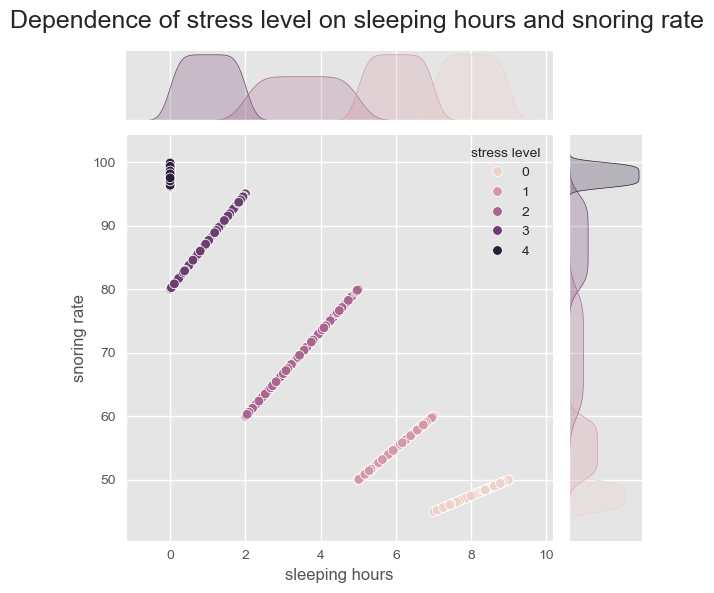

In [189]:
p = sns.jointplot(x='sleeping hours', y='snoring rate', data=df, hue='stress level')
p.fig.suptitle("Dependence of stress level on sleeping hours and snoring rate", fontsize=18)
p.fig.tight_layout()

**The more you sleep the less you snore and experience less stress.**

# 8. Conclusion

# 7 to 8 hours of sleep indicate a better snoring rate, good oxygen and body temperature which contributes in minimizing stress level.